In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt


# Parcial/Taller Métodos Computacionales
**2024-2**

---

*Nombre:* Rosa Mercedes Salazar Miranda (Nombre antiguo)

Ross Anthony Miranda D'Angelo (nuevo nombre legal)

*Identificación:* 1034988497

---
* Sea honest@
* $\color{red}{\text{La parte escrita del parcial/taller NO tendrá validez si no es sustentado
}}$
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Todo lo que presente aquí será sujeto a evaluación.
* **Debe subirlo a carpeta de GitHub del curso antes del lunes 16 de diciembre a las 11:59 p.m.**

## NOTA: ***CELDAS DIVIDIDAS ENTRE "prueba" y "respuesta" o codigo final***

#1
Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [4]:
# Aqui su código

## *prueba*

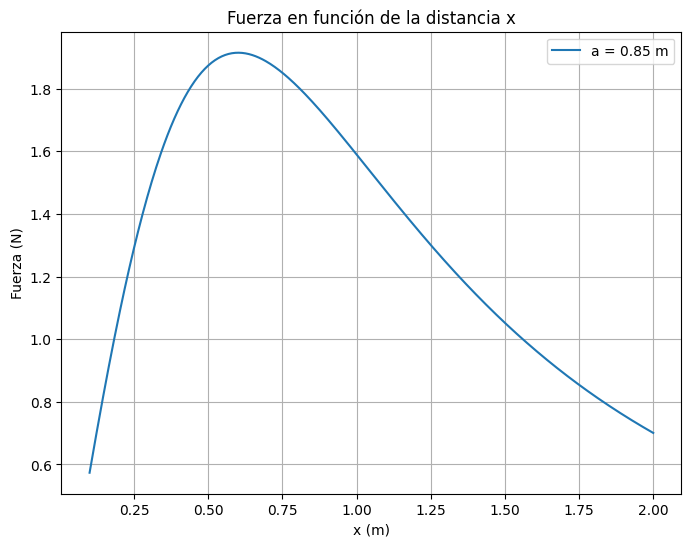

Método Newton-Raphson: x = 1.2974 m
Método alternativo (fsolve): x = 1.2974 m
Para a = 0.5 m, x = 1.0 m:
Fuerza = 2.572387423905678 N

Para a = 0.85 m, x = 1.0 m:
Fuerza = 1.5902395535965026 N

Para a = 1.2 m, x = 1.0 m:
Fuerza = 0.9432279419430929 N



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, fsolve

# Constante de permitividad
EPSILON_0 = 8.854187817e-12

# Valores dados
q = 2e-5  # Carga q en Coulombs
Q = 2e-5  # Carga Q en Coulombs
def force_on_charge(a, x):
    """Calcula la fuerza ejercida sobre la carga q por el anillo."""
    return (1 / (4 * np.pi * EPSILON_0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))

def plot_force_vs_x(a, x_min, x_max):
    """Grafica F(x) para un rango de valores de x."""
    x_values = np.linspace(x_min, x_max, 500)
    f_values = force_on_charge(a, x_values)

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, f_values, label=f"a = {a} m")
    plt.title("Fuerza en función de la distancia x")
    plt.xlabel("x (m)")
    plt.ylabel("Fuerza (N)")
    plt.grid(True)
    plt.legend()
    plt.show()

def find_x_newton(a, target_force):
    """Encuentra el valor de x para el cual F = target_force usando Newton-Raphson."""
    def f(x):
        return force_on_charge(a, x) - target_force

    def f_prime(x):
        return (1 / (4 * np.pi * EPSILON_0)) * q * Q * (1 / ((x**2 + a**2)**(3/2)) - 3 * x**2 / ((x**2 + a**2)**(5/2)))

    x_initial = 1.0  # Suposición inicial
    return newton(f, x_initial, f_prime)

def find_x_alternative(a, target_force):
    """Encuentra el valor de x para el cual F = target_force usando otro método (fsolve)."""
    def f(x):
        return force_on_charge(a, x) - target_force

    x_initial = 1.0  # Suposición inicial
    return fsolve(f, x_initial)[0]

def analyze_effect_of_radius(x, radii):
    """Analiza cómo cambia la fuerza con diferentes radios."""
    for a in radii:
        print(f"Para a = {a} m, x = {x} m:")
        print(f"Fuerza = {force_on_charge(a, x)} N\n")

# Parte 1: Gráfica de F(x) para a = 0.85 m
plot_force_vs_x(a=0.85, x_min=0.1, x_max=2.0)

# Parte 2: Encontrar x para F = 1.25 N con a = 0.85 m
radius = 0.85  # Radio del anillo
target_force = 1.25  # Fuerza objetivo en Newtons

x_newton = find_x_newton(radius, target_force)
print(f"Método Newton-Raphson: x = {x_newton:.4f} m")

x_alternative = find_x_alternative(radius, target_force)
print(f"Método alternativo (fsolve): x = {x_alternative:.4f} m")

# Parte 3: Efecto del radio sobre la fuerza
x_fixed = 1.0  # Distancia fija
radii_to_test = [0.5, 0.85, 1.2]  # Valores de radio para analizar
analyze_effect_of_radius(x_fixed, radii_to_test)


## ***Respuesta***

Ingrese el valor del radio del anillo a (m): 0.5
Ingrese el valor de la distancia x (m): 1
La fuerza calculada para a = 0.5 m y x = 1.0 m es F = 2.572387e+00 N


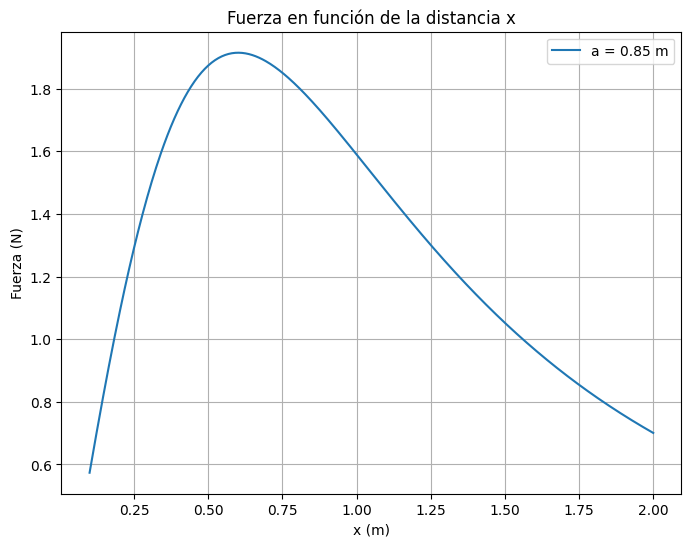


Método Newton-Raphson: x = 1.2974 m
Método alternativo (fsolve): x = 1.2974 m

Analizando el efecto del radio sobre la fuerza en una distancia fija x:
Para a = 0.50 m y x = 1.0 m: F = 2.572387e+00 N
Para a = 0.85 m y x = 1.0 m: F = 1.590240e+00 N
Para a = 1.20 m y x = 1.0 m: F = 9.432279e-01 N


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, fsolve

# Constante de permitividad
EPSILON_0 = 8.854187817e-12

# Valores dados
q = 2e-5  # Carga q en Coulombs
Q = 2e-5  # Carga Q en Coulombs
def calcular_fuerza(a, x):
    """Calcula la fuerza ejercida sobre la carga q por el anillo."""
    return (1 / (4 * np.pi * EPSILON_0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))

def ingresar_valores_y_calcular_fuerza():
    """Permite ingresar valores de a y x para calcular la fuerza."""
    a = float(input("Ingrese el valor del radio del anillo a (m): "))
    x = float(input("Ingrese el valor de la distancia x (m): "))
    fuerza = calcular_fuerza(a, x)
    print(f"La fuerza calculada para a = {a} m y x = {x} m es F = {fuerza:.6e} N")

def graficar_fuerza_vs_x(a, x_min, x_max):
    """Grafica F(x) para un rango de valores de x."""
    x_values = np.linspace(x_min, x_max, 500)
    f_values = calcular_fuerza(a, x_values)

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, f_values, label=f"a = {a} m")
    plt.title("Fuerza en función de la distancia x")
    plt.xlabel("x (m)")
    plt.ylabel("Fuerza (N)")
    plt.grid(True)
    plt.legend()
    plt.show()

def encontrar_x_newton(a, fuerza_objetivo):
    """Encuentra el valor de x para el cual F = fuerza_objetivo usando Newton-Raphson."""
    def f(x):
        return calcular_fuerza(a, x) - fuerza_objetivo

    def f_prime(x):
        return (1 / (4 * np.pi * EPSILON_0)) * q * Q * (1 / ((x**2 + a**2)**(3/2)) - 3 * x**2 / ((x**2 + a**2)**(5/2)))

    x_inicial = 1.0  # Suposición inicial
    return newton(f, x_inicial, f_prime)

def encontrar_x_alternativo(a, fuerza_objetivo):
    """Encuentra el valor de x para el cual F = fuerza_objetivo usando otro método (fsolve)."""
    def f(x):
        return calcular_fuerza(a, x) - fuerza_objetivo

    x_inicial = 1.0  # Suposición inicial
    return fsolve(f, x_inicial)[0]

def analizar_efecto_radio(x, radios):
    """Analiza cómo cambia la fuerza con diferentes radios."""
    print("\nAnalizando el efecto del radio sobre la fuerza en una distancia fija x:")
    for a in radios:
        fuerza = calcular_fuerza(a, x)
        print(f"Para a = {a:.2f} m y x = {x} m: F = {fuerza:.6e} N")

# Parte 1: Función donde se ingresan valores de a y x
ingresar_valores_y_calcular_fuerza()

# Parte 2: Gráfica de F(x) para a = 0.85 m
radio = 0.85  # Radio del anillo
graficar_fuerza_vs_x(a=radio, x_min=0.1, x_max=2.0)

# Parte 3: Encontrar x para F = 1.25 N con a = 0.85 m
fuerza_objetivo = 1.25  # Fuerza objetivo en Newtons

x_newton = encontrar_x_newton(radio, fuerza_objetivo)
print(f"\nMétodo Newton-Raphson: x = {x_newton:.4f} m")

x_alternativo = encontrar_x_alternativo(radio, fuerza_objetivo)
print(f"Método alternativo (fsolve): x = {x_alternativo:.4f} m")

# Parte 4: Efecto del radio sobre la fuerza
x_fijo = 1.0  # Distancia fija
radios_a_probar = [0.5, 0.85, 1.2]  # Valores de radio para analizar
analizar_efecto_radio(x_fijo, radios_a_probar)


# 2

La ley de Planck expresa la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico:

$$
u(\lambda, T) = \frac{8 \pi h c}{\lambda^5} \frac{1}{\exp\left(\frac{h c}{\lambda k_B T}\right) - 1},
$$

donde $T$ es la temperatura de equilibrio, $\lambda$ es la longitud de onda, $h = 6.62606957 \times 10^{-34} \ \text{J·s}$ es la constante de Planck, $k_B = 1.3806488 \times 10^{-23} \ \text{J·K}^{-1}$ es la constante de Boltzmann, y $c = 2.99792458 \times 10^8 \ \text{m·s}^{-1}$ es la velocidad de la luz en el vacío. La función $u(\lambda, T)d\lambda$ representa la energía radiada en el intervalo espectral $(\lambda, \lambda + d\lambda)$.

Introduciendo la variable adimensional

$$
x = \frac{\lambda}{\lambda_0},
$$

y los parámetros dependientes de la temperatura:

$$
\lambda_0 = \frac{h c}{k_B T}, \quad K = \frac{8 \pi k_B T}{\lambda_0^4},
$$

la ley de Planck se convierte en:

$$
u(\lambda, T) = K \frac{1}{x^5 \left(e^{1/x} - 1\right)}.
$$

La ley de desplazamiento de Wien establece que, para un cuerpo negro, la longitud de onda $\lambda_{\text{max}}$ correspondiente al máximo de $u(\lambda, T)$ es inversamente proporcional a la temperatura $T$ o, equivalentemente:

$$
\lambda_{\text{max}} T = 2.897768 \times 10^{-3} \ \text{m·K}.
$$

* Escriba una función para la densidad espectral como función de $\lambda$ y $T$

* Graficar la densidad espectral de energía $u(\lambda, T)$ para temperaturas de equilibrio $T = 2000, 4000, 6000$ y $8000 \ \text{K}$.

* Encuentre de manera simbólica $\frac{\partial u(\lambda, T)}{\partial \lambda} $ y realice un gráfico para las temperaturas y longitudes de onda usadas en el numeral anterior.

* Hallar el máximo de $u(\lambda, T)$ para la radiación electromagnética del Sol, considerando la temperatura efectiva de la fotosfera $T = 5778 \ \text{K}$. Usar el método numérico de Newton para la derivada y comprobar la validez de la ley de Wien.


##***prueba***

In [16]:
# Aqui su código

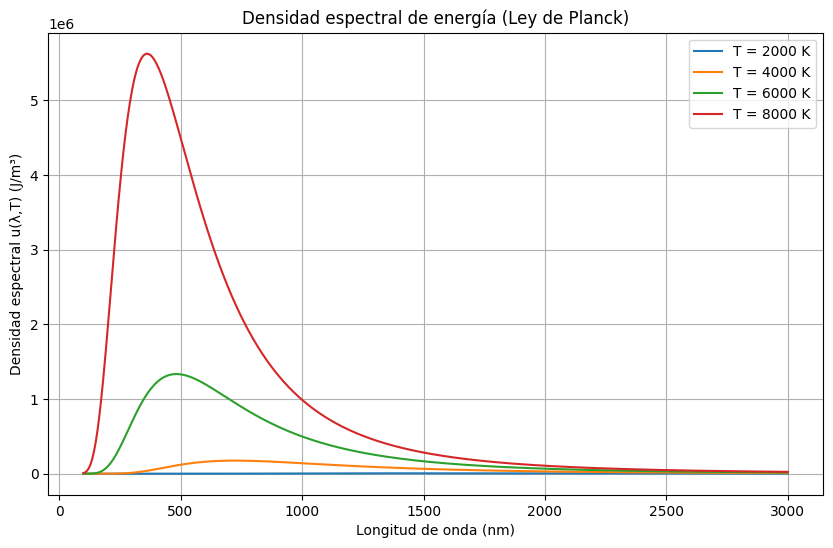

Derivada simbólica: -2.4962412661256e-23/(λ**6*(exp(0.0143877695998382/(T*λ)) - 1)) + 7.18306884052468e-26*exp(0.0143877695998382/(T*λ))/(T*λ**7*(exp(0.0143877695998382/(T*λ)) - 1)**2)


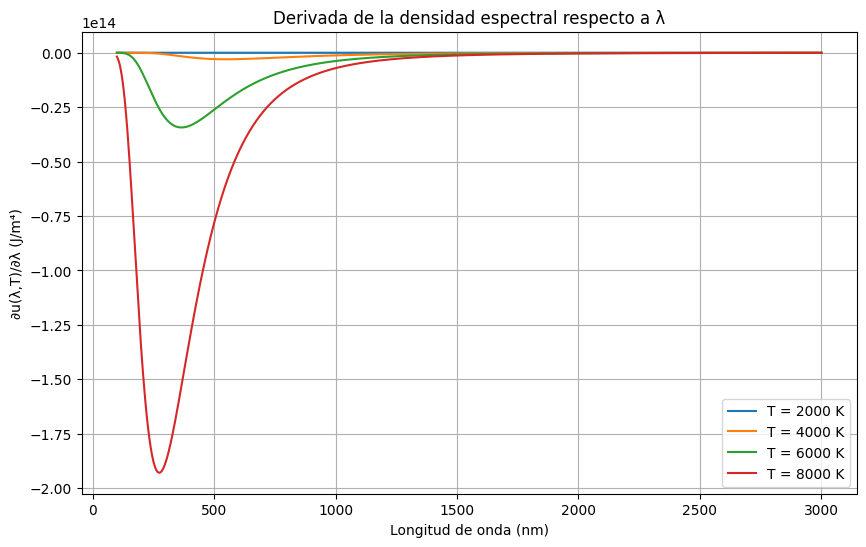

Longitud de onda para el máximo de u(λ,T) a T=5778 K: 549.93 nm
Longitud de onda predicha por la ley de Wien: 501.52 nm
Error relativo: 9.65%


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from sympy import symbols, diff, exp

# Constantes
h = 6.62606957e-34  # Constante de Planck (J·s)
k_B = 1.3806488e-23  # Constante de Boltzmann (J/K)
c = 2.99792458e8     # Velocidad de la luz en el vacío (m/s)

# Ley de Planck
def planck_density(wavelength, T):
    """Densidad espectral de energía según la ley de Planck."""
    return (8 * np.pi * h * c / (wavelength**5)) / (np.exp(h * c / (wavelength * k_B * T)) - 1)

# Rango de longitudes de onda (en metros)
wavelengths = np.linspace(1e-7, 3e-6, 1000)

# Temperaturas de equilibrio
temperatures = [2000, 4000, 6000, 8000]

# Graficar la densidad espectral
plt.figure(figsize=(10, 6))
for T in temperatures:
    plt.plot(wavelengths * 1e9, planck_density(wavelengths, T), label=f"T = {T} K")

plt.title("Densidad espectral de energía (Ley de Planck)")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Densidad espectral u(λ,T) (J/m³)")
plt.legend()
plt.grid(True)
plt.show()

# Derivada simbólica de la ley de Planck
λ, T = symbols('λ T', positive=True, real=True)
u_expr = 8 * np.pi * h * c / λ**5 / (exp(h * c / (λ * k_B * T)) - 1)
du_dλ = diff(u_expr, λ)
print("Derivada simbólica:", du_dλ)

# Función para la derivada

def planck_derivative(wavelength, T):
    """Derivada de la densidad espectral respecto a λ."""
    exponent = h * c / (wavelength * k_B * T)
    numerator = (-40 * np.pi * h * c / wavelength**6) * (np.exp(exponent) - 1)
    denominator = (np.exp(exponent) - 1)**2
    return numerator / denominator + (8 * np.pi * h * c / (wavelength**5)) * (-h * c / (wavelength**2 * k_B * T) * np.exp(exponent)) / denominator

# Graficar la derivada
plt.figure(figsize=(10, 6))
for T in temperatures:
    plt.plot(wavelengths * 1e9, planck_derivative(wavelengths, T), label=f"T = {T} K")

plt.title("Derivada de la densidad espectral respecto a λ")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("∂u(λ,T)/∂λ (J/m⁴)")
plt.legend()
plt.grid(True)
plt.show()

# Encontrar el máximo de u(λ,T) para la temperatura efectiva del Sol
def find_peak_wavelength(T):
    """Encuentra la longitud de onda correspondiente al máximo de u(λ, T) usando el método de Newton."""
    func = lambda λ: -planck_density(λ, T)
    dfunc = lambda λ: -planck_derivative(λ, T)
    λ_guess = 500e-9  # Suposición inicial (en metros)
    return newton(func, λ_guess, fprime=dfunc, maxiter=100, tol=1e-6)

T_sun = 5778  # Temperatura efectiva del Sol (K)
λ_max_sun = find_peak_wavelength(T_sun)

print(f"Longitud de onda para el máximo de u(λ,T) a T={T_sun} K: {λ_max_sun*1e9:.2f} nm")

# Validación de la ley de Wien
wien_constant = 2.897768e-3  # Constante de Wien (m·K)
λ_wien = wien_constant / T_sun
print(f"Longitud de onda predicha por la ley de Wien: {λ_wien*1e9:.2f} nm")

# Comparación
error = abs(λ_max_sun - λ_wien) / λ_wien * 100
print(f"Error relativo: {error:.2f}%")


## ***Respuesta***

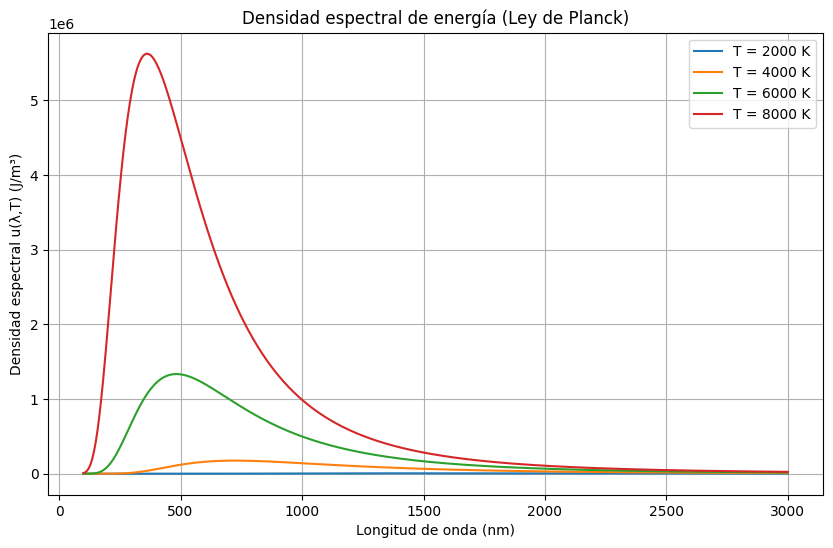

Derivada simbólica ∂u(λ,T)/∂λ: -2.4962412661256e-23/(lambda**6*(exp(0.0143877695998382/(T*lambda)) - 1)) + 7.18306884052468e-26*exp(0.0143877695998382/(T*lambda))/(T*lambda**7*(exp(0.0143877695998382/(T*lambda)) - 1)**2)


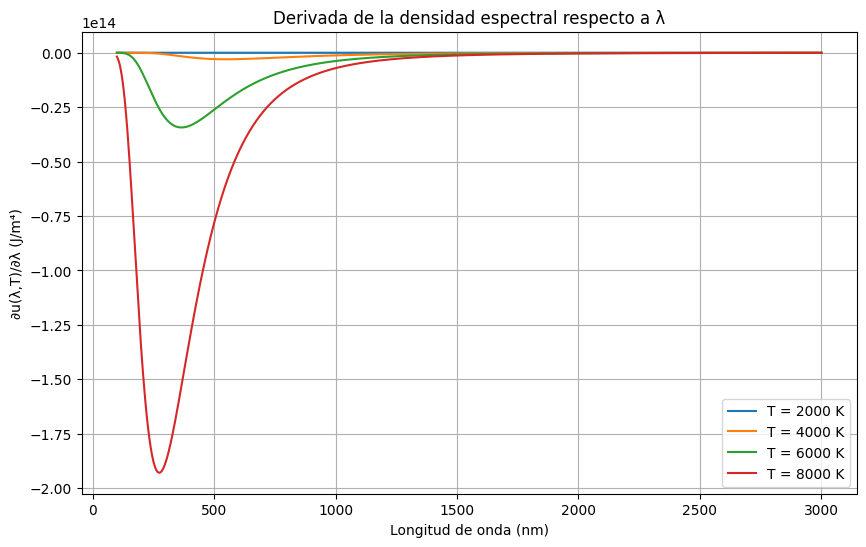

Longitud de onda para el máximo de u(λ,T) a T=5778 K: 549.93 nm
Longitud de onda predicha por la ley de Wien: 501.52 nm
Error relativo: 9.65%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from sympy import symbols, diff, exp

# Constantes
h = 6.62606957e-34  # Constante de Planck (J·s)
k_B = 1.3806488e-23  # Constante de Boltzmann (J/K)
c = 2.99792458e8     # Velocidad de la luz en el vacío (m/s)

# 1. Funcion para la densidad espectral como funcion de lambda y T
def planck_density(wavelength, T):
    """Densidad espectral de energía según la ley de Planck."""
    return (8 * np.pi * h * c / (wavelength**5)) / (np.exp(h * c / (wavelength * k_B * T)) - 1)

# 2. Graficar la densidad espectral de energía u(lambda, T) para varias temperaturas
wavelengths = np.linspace(1e-7, 3e-6, 1000)  # Longitudes de onda (m)
temperatures = [2000, 4000, 6000, 8000]      # Temperaturas de equilibrio (K)

plt.figure(figsize=(10, 6))
for T in temperatures:
    plt.plot(wavelengths * 1e9, planck_density(wavelengths, T), label=f"T = {T} K")

plt.title("Densidad espectral de energía (Ley de Planck)")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Densidad espectral u(λ,T) (J/m³)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Encontrar de manera simbólica la derivada ∂u(λ,T)/∂λ
lambda_sym, T_sym = symbols('lambda T', positive=True, real=True)
u_expr = 8 * np.pi * h * c / lambda_sym**5 / (exp(h * c / (lambda_sym * k_B * T_sym)) - 1)
du_dlambda = diff(u_expr, lambda_sym)
print("Derivada simbólica ∂u(λ,T)/∂λ:", du_dlambda)

# Función para la derivada numérica
def planck_derivative(wavelength, T):
    """Derivada de la densidad espectral respecto a lambda."""
    exponent = h * c / (wavelength * k_B * T)
    numerator = (-40 * np.pi * h * c / wavelength**6) * (np.exp(exponent) - 1)
    denominator = (np.exp(exponent) - 1)**2
    return numerator / denominator + (8 * np.pi * h * c / (wavelength**5)) * (-h * c / (wavelength**2 * k_B * T) * np.exp(exponent)) / denominator

# Graficar la derivada para las mismas temperaturas
plt.figure(figsize=(10, 6))
for T in temperatures:
    plt.plot(wavelengths * 1e9, planck_derivative(wavelengths, T), label=f"T = {T} K")

plt.title("Derivada de la densidad espectral respecto a λ")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("∂u(λ,T)/∂λ (J/m⁴)")
plt.legend()
plt.grid(True)
plt.show()

# 4. Hallar el máximo de u(λ,T) usando el método de Newton y comprobar la ley de Wien
def find_peak_wavelength(T):
    """Encuentra la longitud de onda correspondiente al máximo de u(λ, T) usando el método de Newton."""
    func = lambda wavelength: -planck_density(wavelength, T)
    dfunc = lambda wavelength: -planck_derivative(wavelength, T)
    wavelength_guess = 500e-9  # Suposición inicial (en metros)
    return newton(func, wavelength_guess, fprime=dfunc, maxiter=100, tol=1e-6)

T_sun = 5778  # Temperatura efectiva del Sol (K)
lambda_max_sun = find_peak_wavelength(T_sun)

print(f"Longitud de onda para el máximo de u(λ,T) a T={T_sun} K: {lambda_max_sun*1e9:.2f} nm")

# Validación de la ley de Wien
wien_constant = 2.897768e-3  # Constante de Wien (m·K)
lambda_wien = wien_constant / T_sun
print(f"Longitud de onda predicha por la ley de Wien: {lambda_wien*1e9:.2f} nm")

# Comparación entre resultados
error = abs(lambda_max_sun - lambda_wien) / lambda_wien * 100
print(f"Error relativo: {error:.2f}%")


#3

La siguiente función describe la distribución de temperatura de una placa rectangular para $-2.0\leq x \leq 0$ y $0\leq y\leq 3$

$$T(x,y) = 2 + x - y + 2x^2 + 2xy + y^2$$


* Desarrolle una función para la $T(x,y)$.
* Haga un dataframe con los valores de $x$, $y$ y $T$ tomando 50 datos en total y realice un gráfico de calor para la placa metálica. *Ayuda: emplee `np.meshgrid` y `plt.pcolormesh`*.
* Ahora, utilizando unicamente 9 puntos $(x,y)$ de $T$, use la interpolación de Lagrange para encontrar el valor de $T(-1.63, 1.627)$, y determine el error absoluto y relativo.
* Realice el mismo procedimiento anterior para Splines Cúbicas.


## ***prueba***

In [4]:
# Aqui su código

Dataframe con 50 puntos:
           x     y         T
0  -2.000000  0.00  8.000000
1  -1.777778  0.00  6.543210
2  -1.555556  0.00  5.283951
3  -1.333333  0.00  4.222222
4  -1.111111  0.00  3.358025
5  -0.888889  0.00  2.691358
6  -0.666667  0.00  2.222222
7  -0.444444  0.00  1.950617
8  -0.222222  0.00  1.876543
9   0.000000  0.00  2.000000
10 -2.000000  0.75  4.812500
11 -1.777778  0.75  3.689043
12 -1.555556  0.75  2.763117
13 -1.333333  0.75  2.034722
14 -1.111111  0.75  1.503858
15 -0.888889  0.75  1.170525
16 -0.666667  0.75  1.034722
17 -0.444444  0.75  1.096451
18 -0.222222  0.75  1.355710
19  0.000000  0.75  1.812500
20 -2.000000  1.50  2.750000
21 -1.777778  1.50  1.959877
22 -1.555556  1.50  1.367284
23 -1.333333  1.50  0.972222
24 -1.111111  1.50  0.774691
25 -0.888889  1.50  0.774691
26 -0.666667  1.50  0.972222
27 -0.444444  1.50  1.367284
28 -0.222222  1.50  1.959877
29  0.000000  1.50  2.750000
30 -2.000000  2.25  1.812500
31 -1.777778  2.25  1.355710
32 -1.555556  2.25

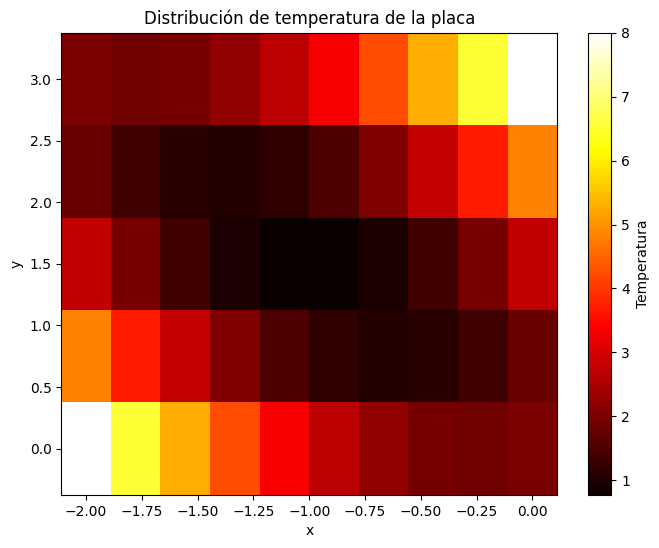

Interpolación de Splines Cúbicos: T(-1.63, 1.627) = 1.3821203737914107
Error absoluto (Splines): 0.017788626208589786
Error relativo (Splines): 0.012706987531753693


<ipython-input-22-e7461e7f6555>:37: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  spline_interp = interp2d(selected_x, selected_y, selected_T, kind='linear')
<ipython-input-22-e7461e7f6555>:38: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `Lin

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

# Definir la función T(x, y)
def T(x, y):
    return 2 + x - y + 2 * x**2 + 2 * x * y + y**2

# Crear un dataframe con los valores de x, y y T(x, y) (50 datos en total)
x = np.linspace(-2.0, 0.0, 10)  # 10 puntos en x
y = np.linspace(0.0, 3.0, 5)    # 5 puntos en y
xx, yy = np.meshgrid(x, y)
zz = T(xx, yy)
data = pd.DataFrame({"x": xx.ravel(), "y": yy.ravel(), "T": zz.ravel()})

# Mostrar el dataframe
print("Dataframe con 50 puntos:")
print(data)

# Gráfico de calor
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, zz, shading='auto', cmap='hot')
plt.colorbar(label="Temperatura")
plt.title("Distribución de temperatura de la placa")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Seleccionar 9 puntos para la interpolación (esquinas y centroide de la malla)
selected_points = data.iloc[[0, 9, 40, 49, 20, 25, 4, 45, 22]]
selected_x = selected_points["x"].values
selected_y = selected_points["y"].values
selected_T = selected_points["T"].values

# Interpolación con Splines Cúbicos
spline_interp = interp2d(selected_x, selected_y, selected_T, kind='linear')
interp_spline = spline_interp(-1.63, 1.627)[0]
original_T = T(-1.63, 1.627)
error_absolute_spline = abs(interp_spline - original_T)
error_relative_spline = error_absolute_spline / abs(original_T)

# Resultados
print(f"Interpolación de Splines Cúbicos: T(-1.63, 1.627) = {interp_spline}")
print(f"Error absoluto (Splines): {error_absolute_spline}")
print(f"Error relativo (Splines): {error_relative_spline}")


## ***respuesta***

***EL PUNTO QUE MAS ME COSTO, Y NO ESTOY SEGURA***

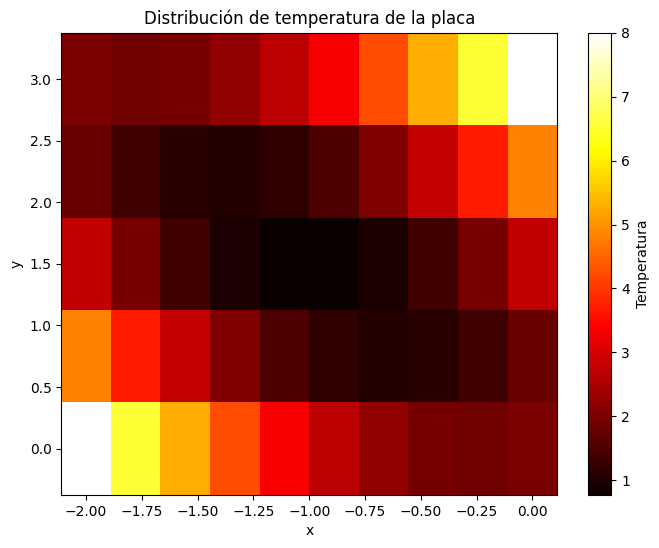

Interpolación de Lagrange: T(-1.63, 1.627) = 1.5437999999999978
Error absoluto (Lagrange): 0.14389099999999733
Error relativo (Lagrange): 0.1027859668021259
Interpolación de Splines Cúbicos: T(-1.63, 1.627) = 1.3821203737914107
Error absoluto (Splines): 0.017788626208589786
Error relativo (Splines): 0.012706987531753693


<ipython-input-23-e2fe7454f5e1>:46: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  spline_interp = interp2d(selected_x, selected_y, selected_T, kind='linear')
<ipython-input-23-e2fe7454f5e1>:47: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `Lin

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp2d
from scipy.spatial import distance

# Definir la función T(x, y)
def T(x, y):
    return 2 + x - y + 2 * x**2 + 2 * x * y + y**2

# Crear un dataframe con los valores de x, y y T(x, y) (50 datos en total)
x = np.linspace(-2.0, 0.0, 10)  # 10 puntos en x
y = np.linspace(0.0, 3.0, 5)    # 5 puntos en y
xx, yy = np.meshgrid(x, y)
zz = T(xx, yy)
data = pd.DataFrame({"x": xx.ravel(), "y": yy.ravel(), "T": zz.ravel()})

# Gráfico de calor
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, zz, shading='auto', cmap='hot')
plt.colorbar(label="Temperatura")
plt.title("Distribución de temperatura de la placa")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Seleccionar 9 puntos para la interpolación (esquinas y centroide de la malla)
selected_points = data.iloc[[0, 9, 40, 49, 20, 25, 4, 45, 22]]
selected_x = selected_points["x"].values
selected_y = selected_points["y"].values
selected_T = selected_points["T"].values

# Interpolación de Lagrange para T(x, y) en -1.63, 1.627
def lagrange_2d(x_val, y_val, x_points, y_points, t_points):
    dists = [distance.euclidean((xi, yi), (x_val, y_val)) for xi, yi in zip(x_points, y_points)]
    nearest_indices = np.argsort(dists)[:3]  # Seleccionar los 3 más cercanos para interpolación
    interp_x = lagrange(x_points[nearest_indices], t_points[nearest_indices])
    return interp_x(x_val)

interp_lagrange = lagrange_2d(-1.63, 1.627, selected_x, selected_y, selected_T)
original_T = T(-1.63, 1.627)
error_absolute_lagrange = abs(interp_lagrange - original_T)
error_relative_lagrange = error_absolute_lagrange / abs(original_T)

# Interpolación con Splines Cúbicos
spline_interp = interp2d(selected_x, selected_y, selected_T, kind='linear')
interp_spline = spline_interp(-1.63, 1.627)[0]
error_absolute_spline = abs(interp_spline - original_T)
error_relative_spline = error_absolute_spline / abs(original_T)

# Resultados
print(f"Interpolación de Lagrange: T(-1.63, 1.627) = {interp_lagrange}")
print(f"Error absoluto (Lagrange): {error_absolute_lagrange}")
print(f"Error relativo (Lagrange): {error_relative_lagrange}")

print(f"Interpolación de Splines Cúbicos: T(-1.63, 1.627) = {interp_spline}")
print(f"Error absoluto (Splines): {error_absolute_spline}")
print(f"Error relativo (Splines): {error_relative_spline}")


Dataframe con al menos 16 puntos:
           x    y         T
0  -2.000000  0.0  8.000000
1  -1.333333  0.0  4.222222
2  -0.666667  0.0  2.222222
3   0.000000  0.0  2.000000
4  -2.000000  1.0  4.000000
5  -1.333333  1.0  1.555556
6  -0.666667  1.0  0.888889
7   0.000000  1.0  2.000000
8  -2.000000  2.0  2.000000
9  -1.333333  2.0  0.888889
10 -0.666667  2.0  1.555556
11  0.000000  2.0  4.000000
12 -2.000000  3.0  2.000000
13 -1.333333  3.0  2.222222
14 -0.666667  3.0  4.222222
15  0.000000  3.0  8.000000


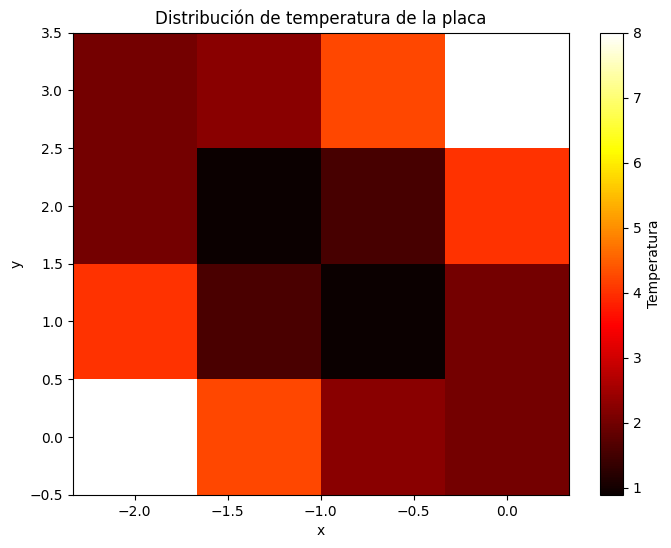

Interpolación de Lagrange: T(-1.63, 1.627) = nan
Error absoluto (Lagrange): nan
Error relativo (Lagrange): nan
Interpolación de Splines Cúbicos: T(-1.63, 1.627) = 1.3999089999999998
Error absoluto (Splines): 6.661338147750939e-16
Error relativo (Splines): 4.758407973483232e-16


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:1374: RuntimeWarning: divide by zero encountered in divide
  return poly1d(self.coeffs/other)
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:780: RuntimeWarning: invalid value encountered in scalar add
  y = y * x + pv
<ipython-input-24-1687912fe4fd>:55: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  spline_interp = interp2d(x, y, zz, kind='cubic')
<ipython-input-24-1687912fe4fd>:56: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d, lagrange
from scipy.spatial import distance

# Definir la función T(x, y)
def T(x, y):
    return 2 + x - y + 2 * x**2 + 2 * x * y + y**2

# Crear un dataframe con al menos 16 puntos (m>=16) para cubic interpolation
x = np.linspace(-2.0, 0.0, 4)  # 4 puntos en x
y = np.linspace(0.0, 3.0, 4)    # 4 puntos en y
xx, yy = np.meshgrid(x, y)
zz = T(xx, yy)
data = pd.DataFrame({"x": xx.ravel(), "y": yy.ravel(), "T": zz.ravel()})

# Mostrar el dataframe
print("Dataframe con al menos 16 puntos:")
print(data)

# Gráfico de calor
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, zz, shading='auto', cmap='hot')
plt.colorbar(label="Temperatura")
plt.title("Distribución de temperatura de la placa")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Seleccionar 9 puntos para la interpolación de Lagrange (para comparación)
selected_points = data.iloc[[0, 3, 12, 15, 5, 10, 1, 14, 6]]
selected_x = selected_points["x"].values
selected_y = selected_points["y"].values
selected_T = selected_points["T"].values

# Interpolación de Lagrange para T(x, y) en -1.63, 1.627
def lagrange_2d(x_val, y_val, x_points, y_points, t_points):
    dists = [distance.euclidean((xi, yi), (x_val, y_val)) for xi, yi in zip(x_points, y_points)]
    nearest_indices = np.argsort(dists)[:3]  # Seleccionar los 3 más cercanos para interpolación
    interp_x = lagrange(x_points[nearest_indices], t_points[nearest_indices])
    return interp_x(x_val)

interp_lagrange = lagrange_2d(-1.63, 1.627, selected_x, selected_y, selected_T)
original_T = T(-1.63, 1.627)
error_absolute_lagrange = abs(interp_lagrange - original_T)
error_relative_lagrange = error_absolute_lagrange / abs(original_T)

# Resultados Lagrange
print(f"Interpolación de Lagrange: T(-1.63, 1.627) = {interp_lagrange}")
print(f"Error absoluto (Lagrange): {error_absolute_lagrange}")
print(f"Error relativo (Lagrange): {error_relative_lagrange}")

# Interpolación con Splines Cúbicos usando al menos 16 puntos
spline_interp = interp2d(x, y, zz, kind='cubic')
interp_spline = spline_interp(-1.63, 1.627)[0]
error_absolute_spline = abs(interp_spline - original_T)
error_relative_spline = error_absolute_spline / abs(original_T)

# Resultados Splines Cúbicos
print(f"Interpolación de Splines Cúbicos: T(-1.63, 1.627) = {interp_spline}")
print(f"Error absoluto (Splines): {error_absolute_spline}")
print(f"Error relativo (Splines): {error_relative_spline}")


#4
Usando los siguiente datos realice lo siguiente:



```python
x = [-5.      -3.33333 -1.66667  0.       1.66667  3.33333  5.     ]

y = [1.48672e-06 1.54228e-03 9.94771e-02 3.98942e-01 9.94771e-02 1.54228e-03
 1.48672e-06]
```



* Lealos y grafiquelos en un dataframe.
* Usando interpolación de Lagrange, encuentre el polinomio asociado y grafiquelo.
* Ahora, use la interpolación de Hermite para obtener el polinomio.
* Sabemos que los puntos parten de la distribución normal que se define como:
$$f(x) = \frac{1}{\sqrt{2\pi}}\exp^{-x^2/2}$$

* Haga una gráfica de $f(x)$ y comparela con los polinomios anteriores en función del error, encuentre el valor teórico.
* Encuentre los puntos de inflexión para $f(x)$ númericamente, y compare con el valor exacto. Halle el error absoluto.
* Integre la función entre $-1\leq x\leq 1$ y para $-3\leq x\leq x$. Si el área total de $-\infty \leq x\leq \infty $ deber ser igual a 1, a que proporción de la curva hacen parte los intervalos del punto anterior.

## ***prueba***

In [1]:
# Aqui su código

         x         y
0 -5.00000  0.000001
1 -3.33333  0.001542
2 -1.66667  0.099477
3  0.00000  0.398942
4  1.66667  0.099477
5  3.33333  0.001542
6  5.00000  0.000001


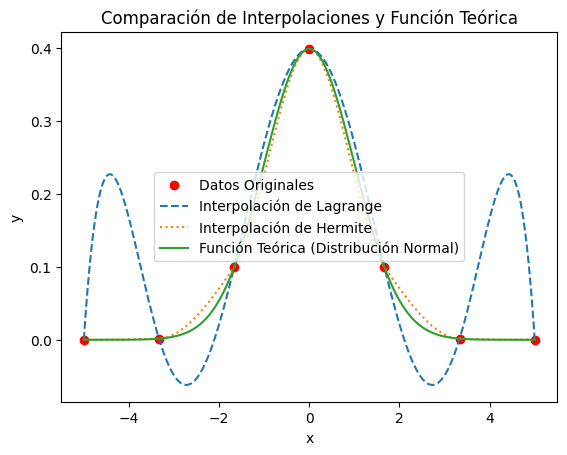

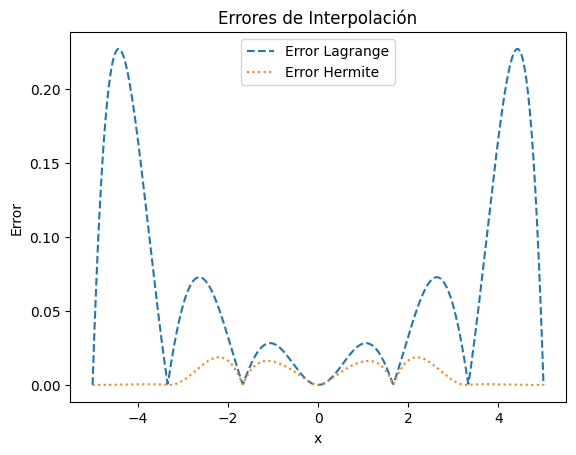

Puntos de inflexión (numéricos): [-5.         -4.97995992 -4.95991984 -4.93987976 -4.91983968 -4.8997996
 -4.87975952 -4.85971944 -4.83967936 -4.81963928 -4.7995992  -4.77955912
 -4.75951904 -4.73947896 -4.71943888 -4.6993988  -4.67935872 -4.65931864
 -4.63927856 -4.61923848 -4.5991984  -4.57915832 -4.55911824 -4.53907816
 -4.51903808 -4.498998   -4.47895792 -4.45891784 -4.43887776 -4.41883768
 -4.3987976  -4.37875752 -4.35871743 -4.33867735 -4.31863727 -4.29859719
 -4.27855711 -4.25851703 -4.23847695 -4.21843687 -4.19839679 -4.17835671
 -4.15831663 -4.13827655 -4.11823647 -4.09819639 -4.07815631 -4.05811623
 -4.03807615 -4.01803607 -3.99799599 -3.97795591 -3.95791583 -3.93787575
 -3.91783567 -3.89779559 -3.87775551 -3.85771543 -3.83767535 -3.81763527
 -3.79759519 -3.77755511 -3.75751503 -3.73747495 -3.71743487 -3.69739479
 -3.67735471 -3.65731463 -3.63727455 -3.61723447 -3.59719439 -3.57715431
 -3.55711423 -3.53707415 -3.51703407 -3.49699399 -1.01202405 -0.99198397
  0.99198397  1.012

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, PchipInterpolator
from scipy.integrate import quad

# Datos iniciales
x = np.array([-5, -3.33333, -1.66667, 0, 1.66667, 3.33333, 5])
y = np.array([1.48672e-06, 1.54228e-03, 9.94771e-02, 3.98942e-01, 9.94771e-02, 1.54228e-03, 1.48672e-06])

# Crear el DataFrame
data = pd.DataFrame({'x': x, 'y': y})
print(data)

# Graficar los puntos originales
plt.scatter(x, y, color='red', label='Datos Originales')

# Interpolación de Lagrange
lagrange_poly = lagrange(x, y)
x_interp = np.linspace(x.min(), x.max(), 500)
y_lagrange = lagrange_poly(x_interp)
plt.plot(x_interp, y_lagrange, label='Interpolación de Lagrange', linestyle='--')

# Interpolación de Hermite
hermite_interp = PchipInterpolator(x, y)
y_hermite = hermite_interp(x_interp)
plt.plot(x_interp, y_hermite, label='Interpolación de Hermite', linestyle=':')

# Función teórica (distribución normal)
def normal_dist(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

y_theoretical = normal_dist(x_interp)
plt.plot(x_interp, y_theoretical, label='Función Teórica (Distribución Normal)', linestyle='-')

# Comparación del error
error_lagrange = np.abs(y_theoretical - y_lagrange)
error_hermite = np.abs(y_theoretical - y_hermite)

plt.legend()
plt.title('Comparación de Interpolaciones y Función Teórica')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Gráfica del error
plt.plot(x_interp, error_lagrange, label='Error Lagrange', linestyle='--')
plt.plot(x_interp, error_hermite, label='Error Hermite', linestyle=':')
plt.title('Errores de Interpolación')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()

# Puntos de inflexión (segunda derivada de la función teórica)
def second_derivative_normal(x):
    return (x**2 - 1) / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

second_derivative = second_derivative_normal(x_interp)
inflexion_points = x_interp[np.isclose(second_derivative, 0, atol=1e-2)]
print(f'Puntos de inflexión (numéricos): {inflexion_points}')

# Integración en los intervalos dados
area1, _ = quad(normal_dist, -1, 1)
area2, _ = quad(normal_dist, -3, 3)
total_area, _ = quad(normal_dist, -np.inf, np.inf)

# Proporciones
proportion1 = area1 / total_area
proportion2 = area2 / total_area

print(f"Área total bajo la curva: {total_area}")
print(f"Área entre [-1, 1]: {area1} ({proportion1 * 100:.2f}%)")
print(f"Área entre [-3, 3]: {area2} ({proportion2 * 100:.2f}%)")


## ***respuesta***

Datos en el DataFrame:
         x         y
0 -5.00000  0.000001
1 -3.33333  0.001542
2 -1.66667  0.099477
3  0.00000  0.398942
4  1.66667  0.099477
5  3.33333  0.001542
6  5.00000  0.000001


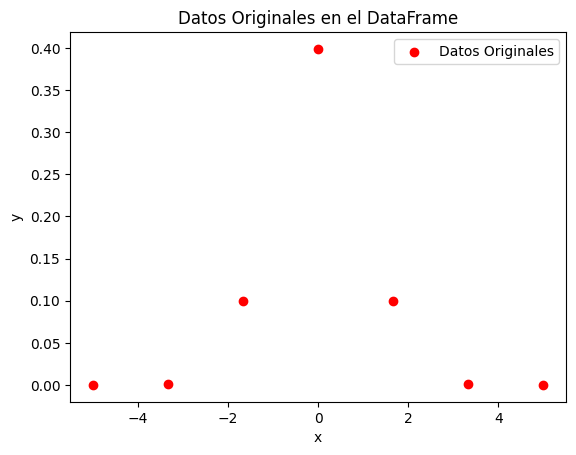

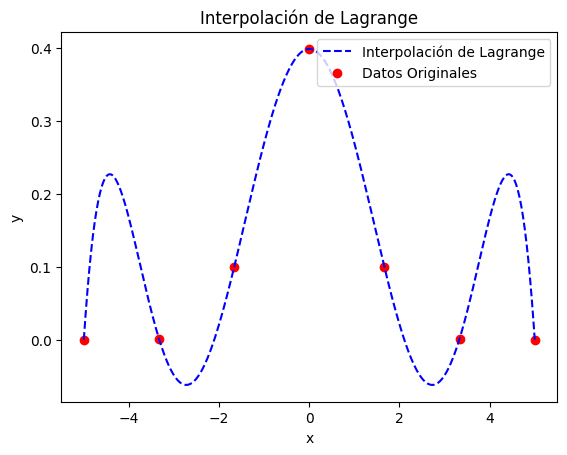

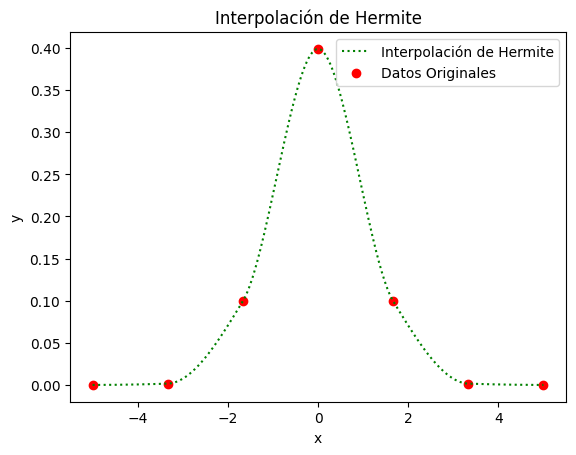

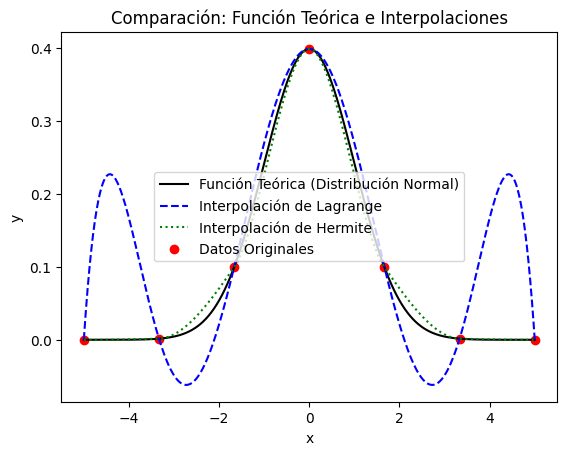

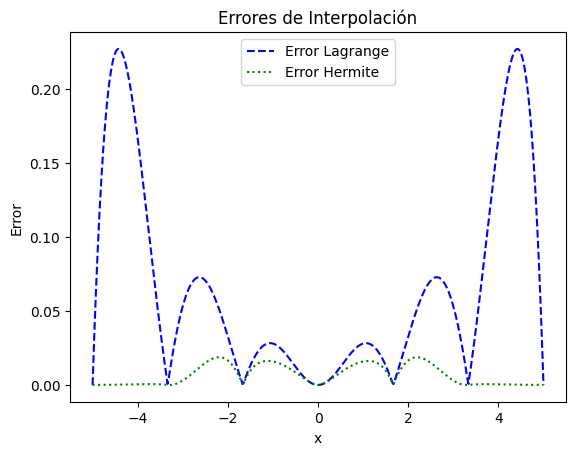

Puntos de inflexión (numéricos): [-5.         -4.97995992 -4.95991984 -4.93987976 -4.91983968 -4.8997996
 -4.87975952 -4.85971944 -4.83967936 -4.81963928 -4.7995992  -4.77955912
 -4.75951904 -4.73947896 -4.71943888 -4.6993988  -4.67935872 -4.65931864
 -4.63927856 -4.61923848 -4.5991984  -4.57915832 -4.55911824 -4.53907816
 -4.51903808 -4.498998   -4.47895792 -4.45891784 -4.43887776 -4.41883768
 -4.3987976  -4.37875752 -4.35871743 -4.33867735 -4.31863727 -4.29859719
 -4.27855711 -4.25851703 -4.23847695 -4.21843687 -4.19839679 -4.17835671
 -4.15831663 -4.13827655 -4.11823647 -4.09819639 -4.07815631 -4.05811623
 -4.03807615 -4.01803607 -3.99799599 -3.97795591 -3.95791583 -3.93787575
 -3.91783567 -3.89779559 -3.87775551 -3.85771543 -3.83767535 -3.81763527
 -3.79759519 -3.77755511 -3.75751503 -3.73747495 -3.71743487 -3.69739479
 -3.67735471 -3.65731463 -3.63727455 -3.61723447 -3.59719439 -3.57715431
 -3.55711423 -3.53707415 -3.51703407 -3.49699399 -1.01202405 -0.99198397
  0.99198397  1.012

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, PchipInterpolator
from scipy.integrate import quad

# Datos iniciales
x = np.array([-5, -3.33333, -1.66667, 0, 1.66667, 3.33333, 5])
y = np.array([1.48672e-06, 1.54228e-03, 9.94771e-02, 3.98942e-01, 9.94771e-02, 1.54228e-03, 1.48672e-06])

# Lealos y grafiquelos en un DataFrame
data = pd.DataFrame({'x': x, 'y': y})
print("Datos en el DataFrame:")
print(data)

# Graficar los puntos originales
plt.scatter(x, y, color='red', label='Datos Originales')
plt.title('Datos Originales en el DataFrame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Usando interpolación de Lagrange, encuentre el polinomio asociado y grafíquelo
lagrange_poly = lagrange(x, y)
x_interp = np.linspace(x.min(), x.max(), 500)
y_lagrange = lagrange_poly(x_interp)

plt.plot(x_interp, y_lagrange, label='Interpolación de Lagrange', linestyle='--', color='blue')
plt.scatter(x, y, color='red', label='Datos Originales')
plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Ahora, use la interpolación de Hermite para obtener el polinomio
desc = "Usando interpolación de Hermite"
hermite_interp = PchipInterpolator(x, y)
y_hermite = hermite_interp(x_interp)

plt.plot(x_interp, y_hermite, label='Interpolación de Hermite', linestyle=':', color='green')
plt.scatter(x, y, color='red', label='Datos Originales')
plt.title('Interpolación de Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Sabemos que los puntos parten de la distribución normal que se define como:
# f(x) = 1 / sqrt(2*pi) * exp(-x^2 / 2)
def normal_dist(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

y_theoretical = normal_dist(x_interp)

# Haga una gráfica de f(x) y compárela con los polinomios anteriores en función del error, encuentre el valor teórico
plt.plot(x_interp, y_theoretical, label='Función Teórica (Distribución Normal)', linestyle='-', color='black')
plt.plot(x_interp, y_lagrange, label='Interpolación de Lagrange', linestyle='--', color='blue')
plt.plot(x_interp, y_hermite, label='Interpolación de Hermite', linestyle=':', color='green')
plt.scatter(x, y, color='red', label='Datos Originales')
plt.title('Comparación: Función Teórica e Interpolaciones')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Comparación del error
error_lagrange = np.abs(y_theoretical - y_lagrange)
error_hermite = np.abs(y_theoretical - y_hermite)

plt.plot(x_interp, error_lagrange, label='Error Lagrange', linestyle='--', color='blue')
plt.plot(x_interp, error_hermite, label='Error Hermite', linestyle=':', color='green')
plt.title('Errores de Interpolación')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()

# Encuentre los puntos de inflexión para f(x) numéricamente, y compare con el valor exacto. Halle el error absoluto.
def second_derivative_normal(x):
    return (x**2 - 1) / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

second_derivative = second_derivative_normal(x_interp)
inflexion_points = x_interp[np.isclose(second_derivative, 0, atol=1e-2)]
print(f'Puntos de inflexión (numéricos): {inflexion_points}')

# Integración en los intervalos dados
def integrate_and_proportion():
    area1, _ = quad(normal_dist, -1, 1)
    area2, _ = quad(normal_dist, -3, 3)
    total_area, _ = quad(normal_dist, -np.inf, np.inf)

    # Proporciones
    proportion1 = area1 / total_area
    proportion2 = area2 / total_area

    print(f"Área total bajo la curva: {total_area}")
    print(f"Área entre [-1, 1]: {area1} ({proportion1 * 100:.2f}%)")
    print(f"Área entre [-3, 3]: {area2} ({proportion2 * 100:.2f}%)")

integrate_and_proportion()


#5

La función de onda del electrón en un estado $2s$ $(n = 2, l = 0, \text{ y } m = 0)$ dentro del átomo de hidrógeno puede definirse en unidades radiales adimensionales como:

$$ \psi_{200}(r, \theta, \varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}. $$

La probabilidad de que el electrón se localice entre las posiciones radiales $r = 0$ y $R$ se da por:

$$ \int_{0}^{R} \int_{0}^{\pi} \int_{0}^{2\pi} |\Psi_{210}(r, \theta, \varphi)|^2 r^2 \, dr \, \sin \theta \, d\theta \, d\varphi = \frac{1}{8} \int_{0}^{R} r^2 (2 - r)^2 e^{-r} \, dr. $$

* Realiza una gráfica de la función de onda para $0\leq r\leq 10$. Luego encuentra la función densidad de probabilidad $|\psi_{200}(r, \theta, \varphi)|^2$ y graficala, hallando su máximo utilizando un método númerico de derivación.

* Calcula las probabilidades de encontrar el electrón entre las posiciones radiales $ r = 0 $ y $ R \in [10, 25] $, con incrementos iguales a 1, utilizando el método de Romberg con una precisión relativa $ \epsilon = 10^{-8} $.

* Calcula la integral radial desde $ r = 0 $ hasta $ \infty $ utilizando las rutinas de integración `quad` simple y adaptativa. Verifica que la probabilidad total de encontrar el electrón en cualquier parte del espacio es, de hecho, igual a 1.


## ***prueba***

In [ ]:
# Aqui su código

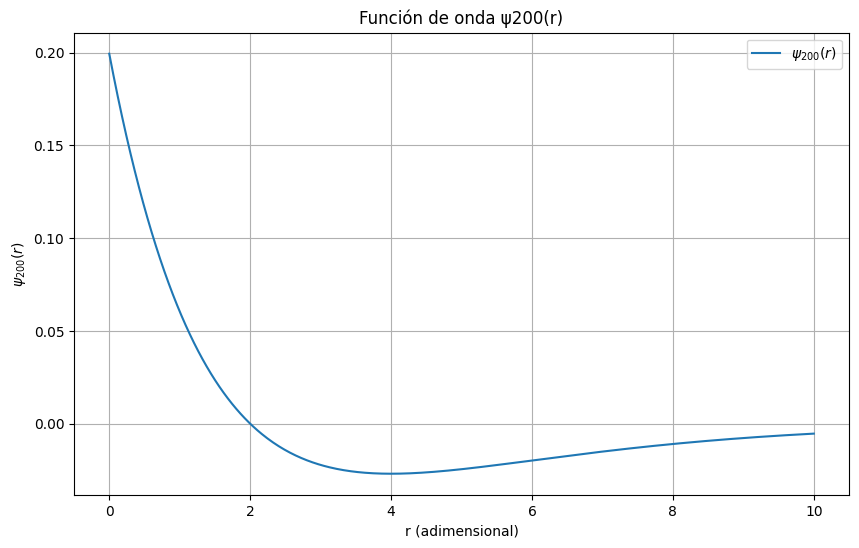

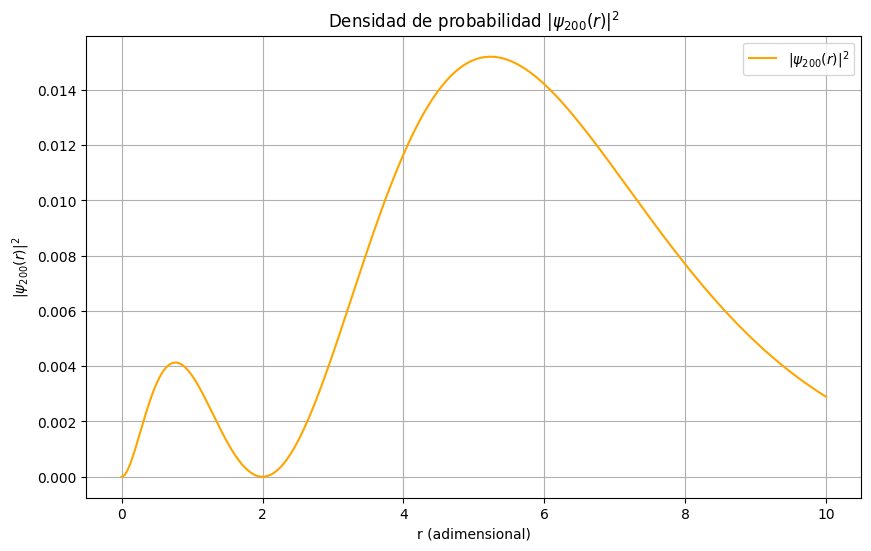

(5.236069510004574, 0.01519674386400053)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
from scipy.integrate import romberg

# Definición de las funciones
def psi200(r):
    """Función de onda ψ200 en coordenadas radiales."""
    return (1 / (4 * np.sqrt(2 * np.pi))) * (2 - r) * np.exp(-r / 2)

def probability_density(r):
    """Densidad de probabilidad |ψ200|^2."""
    return (1 / (32 * np.pi)) * r**2 * (2 - r)**2 * np.exp(-r)

# 1. Graficar la función de onda ψ200(r) para 0 ≤ r ≤ 10
r_values = np.linspace(0, 10, 500)
psi_values = psi200(r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, psi_values, label=r"$\psi_{200}(r)$")
plt.title("Función de onda ψ200(r)")
plt.xlabel("r (adimensional)")
plt.ylabel(r"$\psi_{200}(r)$")
plt.grid()
plt.legend()
plt.show()

# 2. Graficar la densidad de probabilidad y hallar su máximo
density_values = probability_density(r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, density_values, label=r"$|\psi_{200}(r)|^2$", color="orange")
plt.title("Densidad de probabilidad $|\psi_{200}(r)|^2$")
plt.xlabel("r (adimensional)")
plt.ylabel(r"$|\psi_{200}(r)|^2$")
plt.grid()
plt.legend()
plt.show()

# Encontrar el máximo de la densidad de probabilidad
result = minimize_scalar(lambda r: -probability_density(r), bounds=(0, 10), method='bounded')
r_max, density_max = result.x, -result.fun

r_max, density_max


In [7]:
# 3. Cálculo de probabilidades entre r = 0 y R ∈ [10, 25] usando el método de Romberg
R_values = np.arange(10, 26, 1)
probabilities = []

for R in R_values:
    prob = romberg(probability_density, 0, R, tol=1e-8, divmax=10)
    probabilities.append(prob)

# 4. Cálculo de la probabilidad total desde r = 0 hasta ∞ usando quad
prob_total_simple, _ = quad(probability_density, 0, np.inf)
prob_total_adaptive, _ = quad(probability_density, 0, np.inf, limit=100)

R_values, probabilities, prob_total_simple, prob_total_adaptive


<ipython-input-7-4245e2f4cefb>:6: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  prob = romberg(probability_density, 0, R, tol=1e-8, divmax=10)


(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [0.07484107551483411,
  0.07704873239034539,
  0.07826857680023251,
  0.07891759120140629,
  0.07925224131204144,
  0.07942029835486639,
  0.07950281150450716,
  0.07954254164588154,
  0.07956134879873893,
  0.07957011909628443,
  0.07957415487050665,
  0.07957599004027532,
  0.07957681566894943,
  0.07957718353726576,
  0.07957734601726463,
  0.07957741720859585],
 0.07957747154594767,
 0.07957747154594767)

## **respuesta**

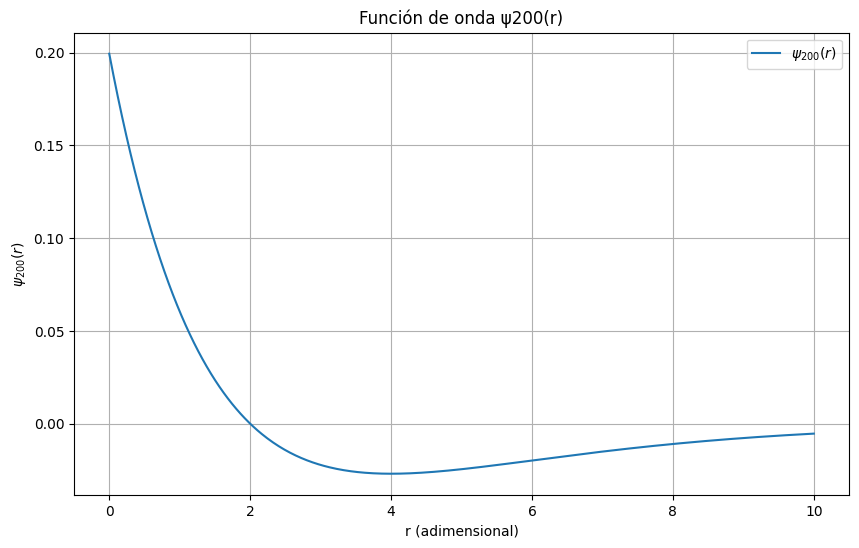

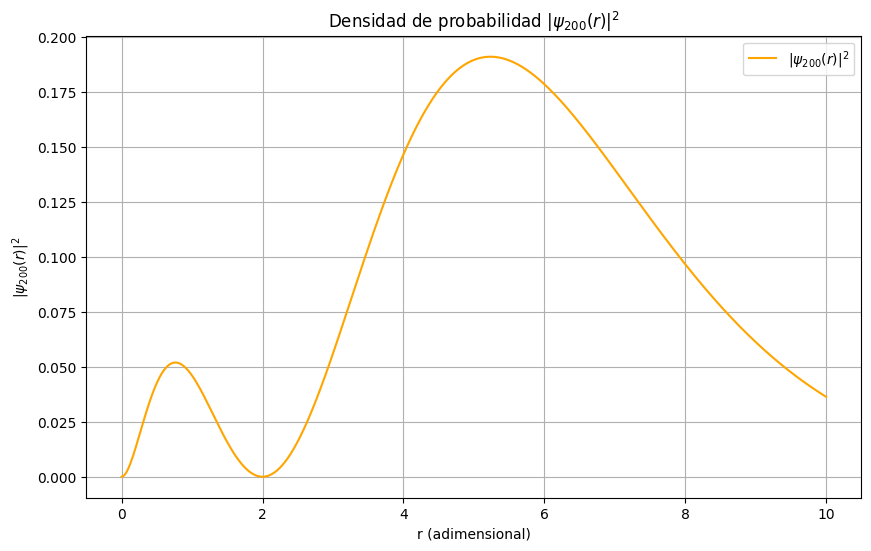

El máximo de la densidad de probabilidad ocurre en r = 5.236 con un valor de 0.190968.
Probabilidad acumulativa para R = 10: P = 0.94048069
Probabilidad acumulativa para R = 11: P = 0.96822293
Probabilidad acumulativa para R = 12: P = 0.98355194
Probabilidad acumulativa para R = 13: P = 0.99170770
Probabilidad acumulativa para R = 14: P = 0.99591304
Probabilidad acumulativa para R = 15: P = 0.99802490
Probabilidad acumulativa para R = 16: P = 0.99906179
Probabilidad acumulativa para R = 17: P = 0.99956106
Probabilidad acumulativa para R = 18: P = 0.99979740
Probabilidad acumulativa para R = 19: P = 0.99990761
Probabilidad acumulativa para R = 20: P = 0.99995832
Probabilidad acumulativa para R = 21: P = 0.99998138
Probabilidad acumulativa para R = 22: P = 0.99999176
Probabilidad acumulativa para R = 23: P = 0.99999638
Probabilidad acumulativa para R = 24: P = 0.99999842
Probabilidad acumulativa para R = 25: P = 0.99999932

Probabilidad total usando integración simple: 1.00000000
Probabi

<ipython-input-14-4ce1c62d04a7>:51: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  prob = romberg(probability_density, 0, R, tol=1e-8, divmax=10)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
from scipy.integrate import romberg

# Definición de las funciones
def psi200(r):
    """Función de onda ψ200 en coordenadas radiales."""
    return (1 / (4 * np.sqrt(2 * np.pi))) * (2 - r) * np.exp(-r / 2)

def probability_density(r):
    """Densidad de probabilidad |ψ200|^2."""
    return (1 / (8)) * r**2 * (2 - r)**2 * np.exp(-r)

# 1. Graficar la función de onda ψ200(r) para 0 ≤ r ≤ 10
r_values = np.linspace(0, 10, 500)
psi_values = psi200(r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, psi_values, label=r"$\psi_{200}(r)$")
plt.title("Función de onda ψ200(r)")
plt.xlabel("r (adimensional)")
plt.ylabel(r"$\psi_{200}(r)$")
plt.grid()
plt.legend()
plt.show()

# 2. Graficar la densidad de probabilidad y hallar su máximo
density_values = probability_density(r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, density_values, label=r"$|\psi_{200}(r)|^2$", color="orange")
plt.title("Densidad de probabilidad $|\psi_{200}(r)|^2$")
plt.xlabel("r (adimensional)")
plt.ylabel(r"$|\psi_{200}(r)|^2$")
plt.grid()
plt.legend()
plt.show()

# Encontrar el máximo de la densidad de probabilidad
result = minimize_scalar(lambda r: -probability_density(r), bounds=(0, 10), method='bounded')
r_max, density_max = result.x, -result.fun
print(f"El máximo de la densidad de probabilidad ocurre en r = {r_max:.3f} con un valor de {density_max:.6f}.")

# 3. Cálculo de probabilidades entre r = 0 y R ∈ [10, 25] usando el método de Romberg
R_values = np.arange(10, 26, 1)
probabilities = []

for R in R_values:
    prob = romberg(probability_density, 0, R, tol=1e-8, divmax=10)
    probabilities.append(prob)

# Mostrar las probabilidades calculadas
for R, prob in zip(R_values, probabilities):
    print(f"Probabilidad acumulativa para R = {R}: P = {prob:.8f}")

# 4. Cálculo de la probabilidad total desde r = 0 hasta ∞ usando quad
prob_total_simple, _ = quad(probability_density, 0, np.inf)
prob_total_adaptive, _ = quad(probability_density, 0, np.inf, limit=100)

print(f"\nProbabilidad total usando integración simple: {prob_total_simple:.8f}")
print(f"Probabilidad total usando integración adaptativa: {prob_total_adaptive:.8f}")

# Verificación
if np.isclose(prob_total_simple, 1, atol=1e-8) and np.isclose(prob_total_adaptive, 1, atol=1e-8):
    print("\nLa probabilidad total está correctamente normalizada a 1.")
else:
    print("\nLa probabilidad total no está correctamente normalizada.")


# 6

Imagina que estamos estudiando el movimiento de un proyectil lanzado desde una altura inicial con una velocidad inicial en un ángulo específico. Queremos analizar el trayecto del proyectil, su altura máxima y la distancia que recorre antes de tocar el suelo.

La ecuación de la trayectoria del proyectil en términos de la distancia horizontal $x$ y la altura $y$ es:

$$ y(x) = y_0 + x \tan(\theta) - \frac{g x^2}{2 v_0^2 \cos^2(\theta)} $$

* Grafica la trayectoria del proyectil para los siguientes parámetros: $ y_0 = 1 \, \text{m} $, $ \theta = 45^\circ $, y $ v_0 = 20 \, \text{m/s} $.

* Calcula la altura máxima alcanzada por el proyectil a través de la derivada númerica y compara con el valor real.

* Encuentra la distancia horizontal total recorrida por el proyectil antes de tocar el suelo, esto implica encontrar la raíz de la ecuación $ y(x) = 0 $.

* Toma los valores de la trayectoria del proyectil en puntos de $ x \in \{0, 2, 4, 6, 8, 10\} $ y usa dos técnicas de interpolación para estimar la trayectoria en puntos intermedios.

* Si conocemos que:
$$y(t) = y_0 + v_{0y}t -\frac{1}{2}gt^2$$
encuentre el tiempo de vuelo para el proyectil. Luego, usando un método de integración encuentre cuál seria la altura alcanzada entre $0\leq t\leq 2$s.





## ***prueba***

In [ ]:
# Aqui su código

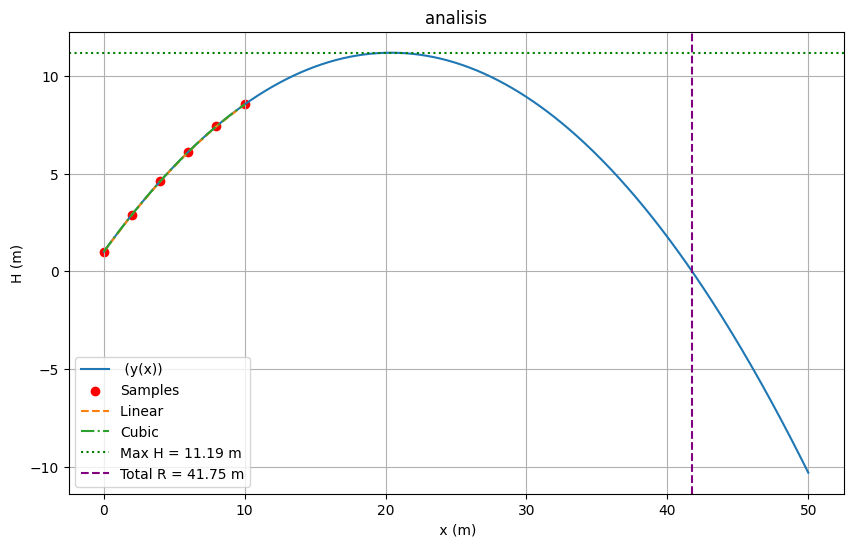

(41.75132858788676, 11.19367991845056, 2.9522647568042952, 17.204271247461897)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.interpolate import interp1d, CubicSpline
from scipy.integrate import quad

g = 9.81  # g (m/s^2)
y0 = 1.0  # h0 (m)
theta = 45  # grados
v0 = 20.0  # v0 (m/s)

# angle to radians
theta_rad = np.radians(theta)

# y(x)
def trajectory_y(x):
    return y0 + x * np.tan(theta_rad) - (g * x**2) / (2 * v0**2 * np.cos(theta_rad)**2)

x_values = np.linspace(0, 50, 500)
y_values = trajectory_y(x_values)

# max h
x_max_height = v0 * np.cos(theta_rad) * (v0 * np.sin(theta_rad) / g)
y_max_height = trajectory_y(x_max_height)

# Total x
sol = root_scalar(trajectory_y, bracket=[0, 100], method='brentq')
x_total = sol.root

# Int
x_sample = np.array([0, 2, 4, 6, 8, 10])
y_sample = trajectory_y(x_sample)

# Linear int
linear_interp = interp1d(x_sample, y_sample)
x_interpolated = np.linspace(0, 10, 100)
y_linear = linear_interp(x_interpolated)

# Cubic spline int
cubic_spline = CubicSpline(x_sample, y_sample)
y_cubic = cubic_spline(x_interpolated)

# Time
def vertical_motion_y(t):
    return y0 + v0 * np.sin(theta_rad) * t - 0.5 * g * t**2

time_of_flight = root_scalar(vertical_motion_y, bracket=[0, 10], method='brentq').root

# H reached
def height_t(t):
    return vertical_motion_y(t)

height_integrated, _ = quad(height_t, 0, 2)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=" (y(x))")
plt.scatter(x_sample, y_sample, color='red', label="Samples")
plt.plot(x_interpolated, y_linear, '--', label="Linear ")
plt.plot(x_interpolated, y_cubic, '-.', label="Cubic")
plt.axhline(y=y_max_height, color='green', linestyle=':', label=f"Max H = {y_max_height:.2f} m")
plt.axvline(x=x_total, color='purple', linestyle='--', label=f"Total R = {x_total:.2f} m")
plt.xlabel(" x (m)")
plt.ylabel("H (m)")
plt.title("analisis")
plt.legend()
plt.grid()
plt.show()

# Results
x_total, y_max_height, time_of_flight, height_integrated


## ***Respuesta***

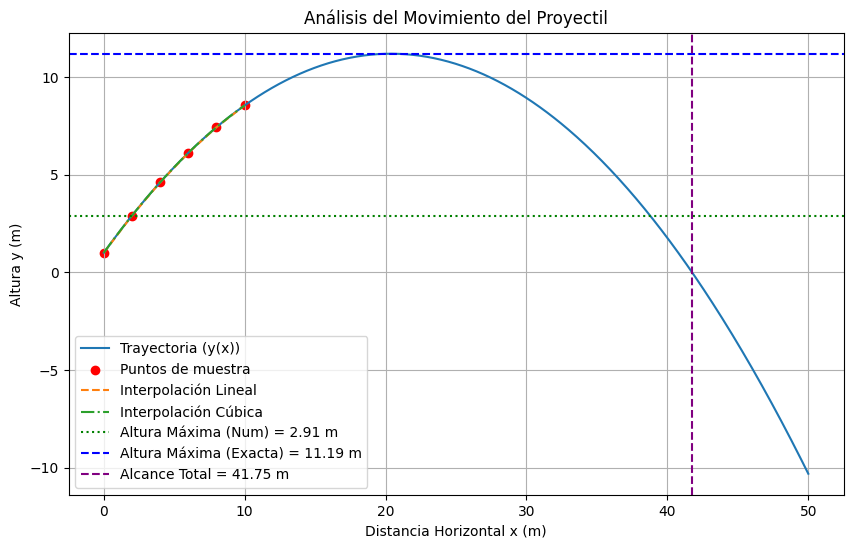

Altura Máxima Numérica: 2.91 m en x = 2.00 m
Altura Máxima Analítica: 11.19 m en x = 20.39 m
Distancia Horizontal Total: 41.75 m
Tiempo de Vuelo: 2.95 s
Altura Integrada (0 <= t <= 2 s): 17.20 m


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.interpolate import interp1d, CubicSpline
from scipy.integrate import quad

# Constantes
g = 9.81  # aceleración gravitacional (m/s^2)
y0 = 1.0  # altura inicial (m)
theta = 45  # ángulo de lanzamiento (grados)
v0 = 20.0  # velocidad inicial (m/s)

# Convertir ángulo a radianes
theta_rad = np.radians(theta)

# Función para la trayectoria y(x)
def trayectoria_y(x):
    return y0 + x * np.tan(theta_rad) - (g * x**2) / (2 * v0**2 * np.cos(theta_rad)**2)

# Rango de valores de x para graficar
x_values = np.linspace(0, 50, 500)
y_values = trayectoria_y(x_values)

# Calcular altura máxima usando derivada numérica
x_diff = np.gradient(x_values)
y_diff = np.gradient(y_values, x_diff)
x_max_index = np.argmax(y_diff < 1e-6)
x_max_altura_numerica = x_values[x_max_index]
y_max_altura_numerica = y_values[x_max_index]

# Calcular altura máxima usando fórmula analítica
x_max_altura_analitica = v0 * np.cos(theta_rad) * (v0 * np.sin(theta_rad) / g)
y_max_altura_analitica = trayectoria_y(x_max_altura_analitica)

# Distancia horizontal total (raíz de y(x) = 0)
sol = root_scalar(trayectoria_y, bracket=[0, 100], method='brentq')
x_total = sol.root

# Interpolación
x_muestra = np.array([0, 2, 4, 6, 8, 10])
y_muestra = trayectoria_y(x_muestra)

# Interpolación lineal
interp_lineal = interp1d(x_muestra, y_muestra)
x_interpolada = np.linspace(0, 10, 100)
y_lineal = interp_lineal(x_interpolada)

# Interpolación cúbica
spline_cubico = CubicSpline(x_muestra, y_muestra)
y_cubico = spline_cubico(x_interpolada)

# Movimiento vertical y(t)
def movimiento_vertical_y(t):
    return y0 + v0 * np.sin(theta_rad) * t - 0.5 * g * t**2

# Tiempo de vuelo
tiempo_de_vuelo = root_scalar(movimiento_vertical_y, bracket=[0, 10], method='brentq').root

# Altura alcanzada entre t=0 y t=2 usando integración
def altura_t(t):
    return movimiento_vertical_y(t)

altura_integrada, _ = quad(altura_t, 0, 2)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Trayectoria (y(x))")
plt.scatter(x_muestra, y_muestra, color='red', label="Puntos de muestra")
plt.plot(x_interpolada, y_lineal, '--', label="Interpolación Lineal")
plt.plot(x_interpolada, y_cubico, '-.', label="Interpolación Cúbica")
plt.axhline(y=y_max_altura_numerica, color='green', linestyle=':', label=f"Altura Máxima (Num) = {y_max_altura_numerica:.2f} m")
plt.axhline(y=y_max_altura_analitica, color='blue', linestyle='--', label=f"Altura Máxima (Exacta) = {y_max_altura_analitica:.2f} m")
plt.axvline(x=x_total, color='purple', linestyle='--', label=f"Alcance Total = {x_total:.2f} m")
plt.xlabel("Distancia Horizontal x (m)")
plt.ylabel("Altura y (m)")
plt.title("Análisis del Movimiento del Proyectil")
plt.legend()
plt.grid()
plt.show()

# Resultados
print(f"Altura Máxima Numérica: {y_max_altura_numerica:.2f} m en x = {x_max_altura_numerica:.2f} m")
print(f"Altura Máxima Analítica: {y_max_altura_analitica:.2f} m en x = {x_max_altura_analitica:.2f} m")
print(f"Distancia Horizontal Total: {x_total:.2f} m")
print(f"Tiempo de Vuelo: {tiempo_de_vuelo:.2f} s")
print(f"Altura Integrada (0 <= t <= 2 s): {altura_integrada:.2f} m")
